In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [98]:
data = pd.read_csv('data/review_preprocessing.csv')
data

,combined_review,sentiment_label
0,angry made post available via possible site us...,Bad
1,real complaint hotel great great location surr...,Good
2,room nice elderly bit difficult room two story...,Good
3,room dirty afraid walk barefoot floor looked c...,Bad
4,booked company line showed picture room though...,Good
...,...,...
515733,trolly staff help take luggage room location,Good
515734,hotel look like 3 surely 4 breakfast ok got ea...,Good
515735,ac useless hot week vienna gave hot air,Bad
515736,room enormous really comfortable believe famil...,Good


In [99]:
data.shape

(515738, 2)

In [100]:
data['sentiment_label'].value_counts()

Good    485035
Bad      30703
Name: sentiment_label, dtype: int64

In [101]:
data.isnull().sum()

combined_review    441
sentiment_label      0
dtype: int64

In [102]:
data_null = data[data['combined_review'].isnull()]
data_null

,combined_review,sentiment_label
706,NaN,Good
1403,NaN,Good
2961,NaN,Good
5225,NaN,Good
6577,NaN,Good
...,...,...
503903,NaN,Good
506832,NaN,Good
510655,NaN,Good
511698,NaN,Good


In [103]:
data = data.dropna()

In [104]:
data = data.drop_duplicates()

<AxesSubplot:xlabel='sentiment_label'>

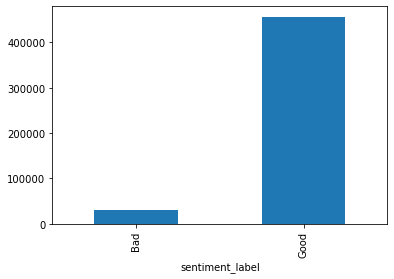

In [105]:
data.groupby('sentiment_label').size().plot(kind = 'bar')

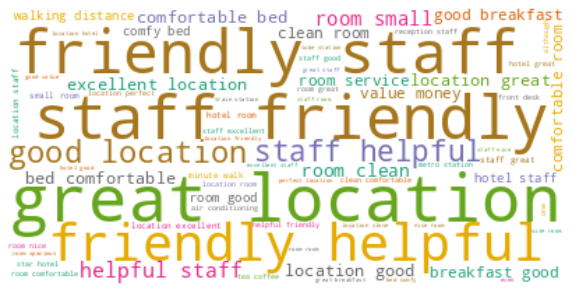

In [106]:

def wordCloud(words) :
    wordCloud = WordCloud(background_color = 'white', colormap = 'Dark2_r', random_state = 21, max_font_size = 120).generate(words)

    plt.figure(figsize = (10, 7))
    plt.imshow(wordCloud, interpolation = 'bilinear')
    plt.axis('off')

all_words = ' '.join([text for text in data['combined_review']])
wordCloud(all_words)

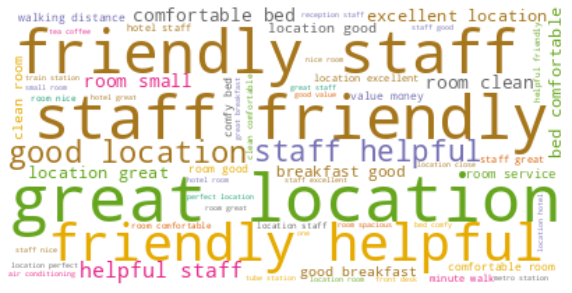

In [107]:
positive_words = ' '.join(text for text in data['combined_review'][data['sentiment_label'] == 'Good'])
wordCloud(positive_words)

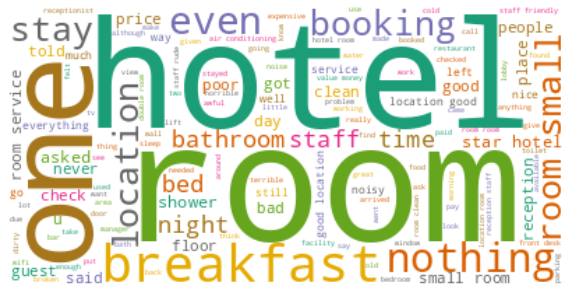

In [108]:
negative_words = ' '.join(text for text in data['combined_review'][data['sentiment_label'] == 'Bad'])
wordCloud(negative_words)

In [109]:
"""neut_words = ' '.join(text for text in data['combined_review'][data['sentiment_label'] == 'Neutral'])
wordCloud(neut_words)"""

"neut_words = ' '.join(text for text in data['combined_review'][data['sentiment_label'] == 'Neutral'])\nwordCloud(neut_words)"

In [110]:
"""n_words = ' '.join(text for text in data['combined_review'][data['sentiment_label'] == 'Negative'])
wordCloud(n_words)"""

"n_words = ' '.join(text for text in data['combined_review'][data['sentiment_label'] == 'Negative'])\nwordCloud(n_words)"

In [111]:
"""vn_words = ' '.join(text for text in data['combined_review'][data['sentiment_label'] == 'Very Negative'])
wordCloud(vn_words)"""

"vn_words = ' '.join(text for text in data['combined_review'][data['sentiment_label'] == 'Very Negative'])\nwordCloud(vn_words)"

In [112]:
data

,combined_review,sentiment_label
0,angry made post available via possible site us...,Bad
1,real complaint hotel great great location surr...,Good
2,room nice elderly bit difficult room two story...,Good
3,room dirty afraid walk barefoot floor looked c...,Bad
4,booked company line showed picture room though...,Good
...,...,...
515733,trolly staff help take luggage room location,Good
515734,hotel look like 3 surely 4 breakfast ok got ea...,Good
515735,ac useless hot week vienna gave hot air,Bad
515736,room enormous really comfortable believe famil...,Good


In [113]:
def get_top_words(text, n_top_words):
    tokens = text.split()
    word_counts = Counter(tokens)
    top_words = word_counts.most_common(n_top_words)
    return dict(top_words)

top_words = {}
for row in data['combined_review']:
    words = get_top_words(row, 10)
    for key, value in words.items():
        if key in top_words:
            top_words[key] += value
        else:
            top_words[key] = value

top_words = dict(sorted(top_words.items(), key=lambda item: item[1], reverse=True)[:10])

for key, value in top_words.items():
    print(f"{key}: {value}")

room: 335003
hotel: 162631
staff: 147220
location: 116671
breakfast: 93264
good: 84054
great: 76443
bed: 63433
small: 46874
nice: 46535


In [114]:
data.to_csv('data/review_clean.csv', index=False)